In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import dataset

In [2]:
data_df = pd.read_csv("data.csv")

In [3]:
data_df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


### Data Imputation (Missing Data Replacement)

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [7]:
for col in data_df.columns:
    missing_data = data_df[col].isna().sum()
    missing_percent = (missing_data)/len(data_df)*100
    print(f"Column {col} has {missing_percent}% missing data")

Column Country has 0.0% missing data
Column Age has 10.0% missing data
Column Salary has 10.0% missing data
Column Purchased has 0.0% missing data


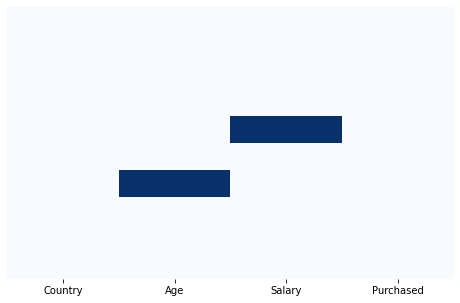

In [9]:
fig, ax = plt.subplots(figsize = (8,5))
sns.heatmap(data_df.isna(),cmap = "Blues", cbar = False , yticklabels = False);

In [18]:
x = data_df.iloc[:,:-1].values
y = data_df.iloc[:,-1].values

In [19]:
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [24]:
from sklearn.impute import SimpleImputer
#Create an instance of Class SimpleImputer: np.nan is the empty value in the dataset

imputer = SimpleImputer(missing_values = np.nan, strategy = "mean")

imputer.fit(x[:,1:3])
x[:,1:3]=imputer.transform(x[:,1:3])

In [25]:
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

## Encode Categorical Data

#### Encode Independent Variable (X)

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
#transformers: specify what kind of transformation, and which cols
#Tuple ('encoder' encoding transformation, instance of Class OneHotEncoder, [col to transform])
#remainder ="passthrough" > to keep the cols which not be transformed. Otherwise, the remaining cols will not be included 
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])] , remainder="passthrough" )
#fit and transform with input = x
#np.array: need to convert output of fit_transform() from matrix to np.array
x = np.array(ct.fit_transform(x))

In [28]:
print(x)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


#### Encode Dependent Variable

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#output of fit_transform of Label Encoder is already a Numpy Array
y = le.fit_transform(y)

In [30]:

print(y)

[0 1 0 0 1 1 0 1 0 1]


#### Splitting the dataset (X = data, y = output) into the Training set and Test set

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [32]:
print(X_train)

[[0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 35.0 58000.0]]


In [33]:

print(X_test)

[[0.0 1.0 0.0 30.0 54000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


In [34]:
print(y_train)

[0 1 0 0 1 1 0 1]


In [35]:

print(y_test)

[0 1]


## Feature Scaling

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,3:] = sc.fit_transform(X_train[:,3:])
#only use Transform to use the SAME scaler as the Training Set
X_test[:,3:] = sc.transform(X_test[:,3:])

In [37]:
print(X_train)


[[0.0 0.0 1.0 -0.19159184384578545 -1.0781259408412425]
 [0.0 1.0 0.0 -0.014117293757057777 -0.07013167641635372]
 [1.0 0.0 0.0 0.566708506533324 0.633562432710455]
 [0.0 0.0 1.0 -0.30453019390224867 -0.30786617274297867]
 [0.0 0.0 1.0 -1.9018011447007988 -1.420463615551582]
 [1.0 0.0 0.0 1.1475343068237058 1.232653363453549]
 [0.0 1.0 0.0 1.4379472069688968 1.5749910381638885]
 [1.0 0.0 0.0 -0.7401495441200351 -0.5646194287757332]]


In [38]:

print(X_test)

[[0.0 1.0 0.0 -1.4661817944830124 -0.9069571034860727]
 [1.0 0.0 0.0 -0.44973664397484414 0.2056403393225306]]


## 5. Training Machine Learning Model

In [40]:
## Models from Scikit-Learn: Search "scikit learn model map"
from sklearn.linear_model import LogisticRegression

In [41]:
logistic_clf = LogisticRegression()
logistic_clf.fit(X_train, y_train)

LogisticRegression()

### 5.1. Evaluate the model
Now we've made some predictions, we can start to use some more Scikit-Learn methods to figure out how good our model is.

Each model or estimator has a built-in score method. This method compares how well the model was able to learn the patterns between the features and labels. In other words, it returns how accurate your model is.

In [42]:
# Evaluate the model on the training set
logistic_clf.score(X_train, y_train)

0.75

In [43]:
# Evaluate the model on the test set
logistic_clf.score(X_test, y_test)

0.5

In [44]:
y_preds = logistic_clf.predict(X_test)
y_preds

array([1, 1])

In [45]:

y_test

array([0, 1])

In [46]:
#Predict with a single input
logistic_clf.predict([[0.0, 0.0, 1.0, -0.19159184384578545, -1.0781259408412425]])

array([0])